In [1]:
print("Temi Falae")

Temi Falae


In [11]:
import pandas as pd
import pyreadstat
import statsmodels.api as sm
import statsmodels.formula.api as smf

df, meta = pyreadstat.read_sav("Obesity.sav")
categorical_vars = [
    "Gender",
    "Race",
    "Marital_status",
    "Education",
    "Occupation",
    "Household_income",
    "WC_coded",
    "BMI_WHO",
    "BMI_CPG",
    "BMI_2cat",
    "BMI_2cat_WHO",
    "BMI_2cat_overweight",
    "BMI_2cat_overweightCPG"
]

continuous_vars = [
    "Age",
    "Weight",
    "Height",
    "WC",
    "Systolic_BP",
    "Diastolic_BP",
    "Confectionary_scale",
    "Nutrition_Confectionary",
    "Fruits_scale",
    "Nutrition_Fruits",
    "Vege_scale",
    "Nutrition_Veggies",
    "BMI"
]


for col in categorical_vars:
    df[col] = df[col].astype("category")

print("Converted categorical variables:\n", categorical_vars)



# Continuous variables summary
print("\n===== Summary Statistics: Continuous Variables =====\n")
display(df[continuous_vars].describe())

# Categorical variables frequency tables
print("\n===== Frequency Tables: Categorical Variables =====\n")
for col in categorical_vars:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print()


print("\n===== Missing Values Per Variable =====\n")
print(df.isnull().sum())


Converted categorical variables:
 ['Gender', 'Race', 'Marital_status', 'Education', 'Occupation', 'Household_income', 'WC_coded', 'BMI_WHO', 'BMI_CPG', 'BMI_2cat', 'BMI_2cat_WHO', 'BMI_2cat_overweight', 'BMI_2cat_overweightCPG']

===== Summary Statistics: Continuous Variables =====



,Age,Weight,Height,WC,Systolic_BP,Diastolic_BP,Confectionary_scale,Nutrition_Confectionary,Fruits_scale,Nutrition_Fruits,Vege_scale,Nutrition_Veggies,BMI
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.350000,67.285400,156.310000,92.910000,128.080000,79.9300,1.180000,1.180000,3.420000,3.420000,5.450000,5.450000,27.535253
std,15.907799,14.586868,10.138132,13.929908,19.989735,11.1756,1.597852,1.597852,2.567001,2.567001,2.262452,2.262452,5.306404
min,18.000000,41.000000,130.000000,43.000000,90.000000,55.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.239048
25%,40.750000,57.015000,149.000000,84.000000,114.750000,73.0000,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,23.643560
50%,53.000000,64.385000,156.000000,93.000000,126.000000,79.0000,0.000000,0.000000,3.000000,3.000000,7.000000,7.000000,27.427771
75%,62.250000,76.725000,162.000000,100.000000,143.250000,85.0000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,30.823225
max,80.000000,112.000000,183.000000,131.000000,179.000000,113.0000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,40.750386



===== Frequency Tables: Categorical Variables =====


--- Gender ---
Gender
2.0    70
1.0    30
Name: count, dtype: int64


--- Race ---
Race
1.0    52
3.0    41
2.0     7
Name: count, dtype: int64


--- Marital_status ---
Marital_status
2.0    66
1.0    22
4.0     7
3.0     5
Name: count, dtype: int64


--- Education ---
Education
3.0    60
2.0    18
4.0    10
1.0     8
5.0     4
Name: count, dtype: int64


--- Occupation ---
Occupation
2.0    30
7.0    17
3.0    16
4.0    15
6.0    14
1.0     4
5.0     4
Name: count, dtype: int64


--- Household_income ---
Household_income
2000.0    18
1500.0    15
3000.0    10
1000.0     8
1800.0     5
500.0      5
5000.0     4
600.0      4
400.0      3
2800.0     3
1200.0     3
6500.0     2
4000.0     2
350.0      2
2500.0     2
550.0      2
800.0      2
700.0      1
150.0      1
900.0      1
750.0      1
1400.0     1
1700.0     1
2400.0     1
2700.0     1
2900.0     1
3200.0     1
Name: count, dtype: int64


--- WC_coded ---
WC_coded
2.0    79
1.

In [18]:
def classify_hypertension(row):
    if row["Systolic_BP"] >= 130 or row["Diastolic_BP"] >= 80:
        return 1   # hypertensive
    else:
        return 0   # not hypertensive

df["Hypertension"] = df.apply(classify_hypertension, axis=1)
df["Hypertension"] = df["Hypertension"].astype(int)


In [19]:
df["Hypertension"].value_counts()
df["Hypertension"].value_counts(normalize=True) * 100


Hypertension
1    60.0
0    40.0
Name: proportion, dtype: float64


#  **Statistical Analysis Plan (SAP)**

## **1. Study Question and Aims**

**Primary question:**
What is the association between dietary patterns (and diet quality scores) and the prevalence of hypertension?

**Aims:**

1. Describe demographic, anthropometric, and dietary characteristics of the sample.
2. Compare the prevalence of hypertension across dietary groups and diet-quality levels.
3. Determine whether dietary patterns or diet-quality scores predict hypertension after adjusting for confounders.
4. Conduct subgroup and sensitivity analyses to test robustness.


## **2. Overview of Analytic Approach**

* Create a binary **Hypertension** variable (SBP ≥130 or DBP ≥80).
* Perform descriptive statistics (means/SD, medians/IQR, frequencies).
* Conduct univariate tests: chi-square, t-tests, Mann–Whitney U.
* Build logistic regression models (progressive adjustment).
* Perform diagnostics: VIF, ROC/AUC, calibration.
* Conduct subgroup + interaction tests.
* Produce tables and visualizations.


## **3. Data Preparation & Initial Exploration**

### **3.1 Variable Definitions**

* **Outcome:**

  * `Hypertension` = 1 if Systolic_BP ≥130 or Diastolic_BP ≥80; else 0.
* **Primary exposures:**

  * Dietary pattern variable, and/or dietary scales (Fruits, Vegetables, Confectionary).
* **Covariates:**

  * Age, Gender, Race, BMI, Education, Income, Occupation, WC, etc.

### **3.2 Missing Data Plan**

* Summarize missingness with `df.isnull().sum()`.
* If **<5%** missing → complete-case analysis.
* If **≥5%** and missingness appears at-random → consider multiple imputation.
* Imputation model should include all variables used in analysis.

### **3.3 Outliers & Distributions**

* Use histograms, boxplots, Q-Q plots for continuous data.
* Identify outliers via:

  * z-scores (|z| > 3)
  * IQR rule (Q1 − 1.5×IQR, Q3 + 1.5×IQR)
* Consider transformations or non-parametric tests for skewed data.
* Conduct sensitivity analyses with outliers removed.

### **3.4 Multicollinearity Assessment**

* Compute VIF for continuous predictors.
* VIF > 5 indicates potentially problematic multicollinearity.
* If multiple highly correlated dietary scales exist, consider:

  * Using single scales,
  * Creating composite indices, or
  * Running PCA for dietary patterns.


## **4. Univariate Analyses**

### **4.1 Descriptive Statistics**

* **Table 1:** Sample characteristics

  * Continuous: mean ± SD or median [IQR]
  * Categorical: n (%)
* Include overall hypertension prevalence.

### **4.2 Univariate Comparisons**

* **Categorical × categorical:** Chi-square (or Fisher’s exact).
* **Continuous × binary:** t-test (if normal) or Mann–Whitney U (if non-normal).
* Report p-values and effect sizes.


## **5. Multivariable Modeling Strategy**

### **5.1 Progressive Logistic Regression Models**

Report ORs and 95% CIs.

**Model 0 (Unadjusted):**
`Hypertension ~ Dietary_variable`

**Model 1 (Demographics):**
`Hypertension ~ Dietary_variable + Age + Gender`

**Model 2 (SES Adjustment):**
`Hypertension ~ Dietary_variable + Age + Gender + Race + Education + Household_income`

**Model 3 (Full Model):**
`Hypertension ~ Dietary_variable + Age + Gender + Race + Education + Household_income + BMI + WC`

### **5.2 Exposure Parameterizations**

* Diet variables as continuous (OR per SD increase).
* Categorical versions (tertiles/quartiles).
* If using PCA: include PC1, PC2 as exposures.


## **6. Model Diagnostics & Performance**

### **6.1 Assumptions & Fit**

* Check linearity of continuous predictors with log-odds.
* Calculate VIF for multicollinearity.
* Detect influential observations (Cook’s distance, leverage).
* Rerun models excluding influential points if needed.

### **6.2 Model Fit & Discrimination**

* Hosmer–Lemeshow goodness-of-fit test.
* ROC curve and AUC for discrimination.
* Calibration plots (predicted vs observed probabilities).


## **7. Subgroup & Interaction Analyses**

### **7.1 Subgroups**

Run stratified logistic models for:

* Sex (Male/Female)
* Age groups (<50 vs ≥50)
* BMI categories (Normal, Overweight/Obese)

### **7.2 Interaction Terms**

Include:

* `Dietary_variable * Gender`
* `Dietary_variable * Age_group`
  Report interaction p-values and stratified ORs.


## **8. Sensitivity Analyses**

* Use alternative hypertension thresholds (e.g., ≥140/90).
* Exclude outliers and re-run models.
* Compare complete-case vs imputed models if applicable.
* Run models with individual diet variables vs grouped diet variables.


## **9. Multiple Testing Considerations**

* Main hypotheses remain primary analyses.
* Exploratory analyses may use FDR correction if needed.
* Emphasize effect sizes and confidence intervals over p-values alone.


## **10. Planned Tables and Figures**

### Tables

1. **Table 1:** Descriptive characteristics.
2. **Table 2:** Hypertension prevalence by dietary groups.
3. **Table 3:** Logistic regression results for Models 0–3.
4. Supplemental: VIF table, sensitivity analysis tables.

### Figures

1. Figure 1: Hypertension prevalence by dietary pattern (bar chart).
2. Figure 2: Scatterplot of diet score vs Systolic BP with regression line.
3. Supplemental: correlation heatmap, ROC curve, calibration plot.


## **11. Statistical Software**

Analyses will be performed using:

* `pandas`, `numpy`
* `matplotlib`, `seaborn`
* `scipy.stats`
* `statsmodels.api` & `statsmodels.formula.api`
* `sklearn.metrics`




In [21]:
df["diet_score"] = (
    df["Fruits_scale"] +
    df["Vege_scale"] -
    df["Confectionary_scale"]
)


In [22]:
df["diet_tertile"] = pd.qcut(df["diet_score"], q=3, labels=["Low", "Medium", "High"])
df["diet_tertile"] = df["diet_tertile"].astype("category")


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

diet_vars = ["Fruits_scale", "Vege_scale", "Confectionary_scale"]

# Standardize the variables
scaler = StandardScaler()
diet_scaled = scaler.fit_transform(df[diet_vars])

# PCA with 2 components
pca = PCA(n_components=2)
pc = pca.fit_transform(diet_scaled)

df["PC1"] = pc[:, 0]
df["PC2"] = pc[:, 1]

print("Explained variance:", pca.explained_variance_ratio_)


Explained variance: [0.49283427 0.34388519]


In [24]:
from scipy.stats import ttest_ind

group1 = df[df["Hypertension"] == 1]["diet_score"]
group0 = df[df["Hypertension"] == 0]["diet_score"]

t, p = ttest_ind(group1, group0, nan_policy="omit")

print("Diet score t-test p-value:", p)


Diet score t-test p-value: 0.07213435350460899


In [25]:
pd.crosstab(df["diet_tertile"], df["Hypertension"], normalize="index")


Hypertension,0,1
diet_tertile,,
Low,0.323529,0.676471
Medium,0.333333,0.666667
High,0.545455,0.454545


In [26]:
m0 = smf.logit("Hypertension ~ diet_score", data=df).fit()
print(m0.summary())


Optimization terminated successfully.
         Current function value: 0.656309
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                 0.02482
Time:                        20:40:00   Log-Likelihood:                -65.631
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                   0.06759
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1034      0.452      2.443      0.015       0.218       1.989
diet_score    -0.0887      0.

In [27]:
m1 = smf.logit("Hypertension ~ diet_score + Age + C(Gender)", data=df).fit()
print(m1.summary())


Optimization terminated successfully.
         Current function value: 0.638209
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                 0.05171
Time:                        20:40:17   Log-Likelihood:                -63.821
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                   0.07317
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0332      0.743     -0.045      0.964      -1.489       1.423
C(Gender)[T

In [29]:
for col in ["Race", "Education", "Household_income"]:
    print(col, df[col].value_counts())


Race Race
1.0    52
3.0    41
2.0     7
Name: count, dtype: int64
Education Education
3.0    60
2.0    18
4.0    10
1.0     8
5.0     4
Name: count, dtype: int64
Household_income Household_income
2000.0    18
1500.0    15
3000.0    10
1000.0     8
1800.0     5
500.0      5
5000.0     4
600.0      4
400.0      3
2800.0     3
1200.0     3
6500.0     2
4000.0     2
350.0      2
2500.0     2
550.0      2
800.0      2
700.0      1
150.0      1
900.0      1
750.0      1
1400.0     1
1700.0     1
2400.0     1
2700.0     1
2900.0     1
3200.0     1
Name: count, dtype: int64


In [31]:
df["Race"] = df["Race"].astype(float)

df["Race_collapsed"] = df["Race"].replace({
    1.0: 1,
    2.0: 1,
    3.0: 2
})

In [39]:
df["Education"] = df["Education"].astype(float)

df["Edu_collapsed"] = df["Education"].replace({
    1.0: 1,   # low education
    2.0: 1,   # low education
    3.0: 2,   # medium education
    4.0: 2,   # medium education
    5.0: 3    # high education
})


In [38]:
df["Household_income"] = df["Household_income"].astype(float)

df["Income_quartile"] = pd.qcut(df["Household_income"], q=4, labels=["Q1","Q2","Q3","Q4"])

In [41]:
m2 = smf.logit(
    "Hypertension ~ diet_score + Age + C(Gender) + C(Race_collapsed) + C(Edu_collapsed) + C(Income_quartile)",
    data=df
).fit()
print(m2.summary())


         Current function value: 0.584440
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                  100
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            9
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.1316
Time:                        20:47:11   Log-Likelihood:                -58.444
converged:                      False   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                   0.03864
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.5562      1.148     -0.485      0.628      -2.806       1.693
C(Gender)[T.2.0]       

C:\Users\temif\OneDrive\Documents\GitHub\BIOS-584\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
m3 = smf.logit(
    "Hypertension ~ diet_score + Age + C(Gender) + C(Race_collapsed) + C(Edu_collapsed) + C(Income_quartile) + BMI +WC",
    data=df
).fit()
print(m3.summary())


         Current function value: 0.572484
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                  100
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                           11
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.1494
Time:                        20:48:28   Log-Likelihood:                -57.248
converged:                      False   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                   0.04392
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.9861      1.984     -1.505      0.132      -6.876       0.903
C(Gender)[T.2.0]       

C:\Users\temif\OneDrive\Documents\GitHub\BIOS-584\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
print("AIC of models:")
print("M0:", m0.aic)
print("M1:", m1.aic)
print("M2:", m2.aic)
print("M3:", m3.aic)


AIC of models:
M0: 135.26172018935037
M1: 135.64187512053354
M2: 136.88792194583795
M3: 138.4968971714277


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[["Age", "BMI", "WC"]].dropna()

X = sm.add_constant(X)

vif_df = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_df



,Variable,VIF
0,const,55.209545
1,Age,1.006780
2,BMI,1.571845
3,WC,1.579913


In [46]:
m_int = smf.logit(
    "Hypertension ~ diet_score * C(Gender) + Age + BMI",
    data=df
).fit()

print(m_int.summary())


Optimization terminated successfully.
         Current function value: 0.621757
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                 0.07616
Time:                        20:52:11   Log-Likelihood:                -62.176
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                   0.06843
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.5772      1.434     -1.100      0.271   

In [47]:
male = df[df["Gender"] == 1]   # adjust coding
female = df[df["Gender"] == 2]

m_male = smf.logit("Hypertension ~ diet_score + Age + BMI", data=male).fit()
m_female = smf.logit("Hypertension ~ diet_score + Age + BMI", data=female).fit()

print(m_male.summary())
print(m_female.summary())


Optimization terminated successfully.
         Current function value: 0.583146
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.633499
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.1477
Time:                        20:52:14   Log-Likelihood:                -17.494
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                    0.1085
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [48]:
df["HTN_140"] = ((df["Systolic_BP"] >= 140) | (df["Diastolic_BP"] >= 90)).astype(int)

m_sens = smf.logit(
    "HTN_140 ~ diet_score + Age + BMI + C(Gender)",
    data=df
).fit()

print(m_sens.summary())


Optimization terminated successfully.
         Current function value: 0.596766
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                HTN_140   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                 0.05899
Time:                        20:52:17   Log-Likelihood:                -59.677
converged:                       True   LL-Null:                       -63.418
Covariance Type:            nonrobust   LLR p-value:                    0.1125
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5162      1.442     -1.051      0.293      -4.342       1.310
C(Gender)[T

In [50]:
# Table 1 – Summary for continuous variables
table1_cont = df[["Age", "BMI", "WC", "Systolic_BP", "Diastolic_BP", "diet_score"]].describe().T
table1_cont

cat_vars = ["Gender", "Race_collapsed", "Edu_collapsed", "Income_quartile", "Hypertension"]

table1_cat = {}
for col in cat_vars:
    table1_cat[col] = df[col].value_counts(dropna=False).rename("Count")
    table1_cat[col + "_percent"] = df[col].value_counts(normalize=True, dropna=False)*100

table1_cat


{'Gender': Gender
 2.0    70
 1.0    30
 Name: Count, dtype: int64,
 'Gender_percent': Gender
 2.0    70.0
 1.0    30.0
 Name: proportion, dtype: float64,
 'Race_collapsed': Race_collapsed
 1.0    59
 2.0    41
 Name: Count, dtype: int64,
 'Race_collapsed_percent': Race_collapsed
 1.0    59.0
 2.0    41.0
 Name: proportion, dtype: float64,
 'Edu_collapsed': Edu_collapsed
 2.0    70
 1.0    26
 3.0     4
 Name: Count, dtype: int64,
 'Edu_collapsed_percent': Edu_collapsed
 2.0    70.0
 1.0    26.0
 3.0     4.0
 Name: proportion, dtype: float64,
 'Income_quartile': Income_quartile
 Q1    30
 Q3    26
 Q4    24
 Q2    20
 Name: Count, dtype: int64,
 'Income_quartile_percent': Income_quartile
 Q1    30.0
 Q3    26.0
 Q4    24.0
 Q2    20.0
 Name: proportion, dtype: float64,
 'Hypertension': Hypertension
 1    60
 0    40
 Name: Count, dtype: int64,
 'Hypertension_percent': Hypertension
 1    60.0
 0    40.0
 Name: proportion, dtype: float64}

In [51]:
table2 = pd.crosstab(df["diet_tertile"], df["Hypertension"], margins=True)
table2

table2_pct = pd.crosstab(df["diet_tertile"], df["Hypertension"], normalize="index")*100
table2_pct


Hypertension,0,1
diet_tertile,,
Low,32.352941,67.647059
Medium,33.333333,66.666667
High,54.545455,45.454545


In [53]:
import numpy as np

def extract_or_ci(model):
    params = model.params
    conf = model.conf_int()
    or_ci = pd.DataFrame({
        "OR": params.apply(np.exp),
        "CI_lower": conf[0].apply(np.exp),
        "CI_upper": conf[1].apply(np.exp),
        "p-value": model.pvalues
    })
    return or_ci
table3_m0 = extract_or_ci(m0)
table3_m1 = extract_or_ci(m1)
table3_m2 = extract_or_ci(m2)
table3_m3 = extract_or_ci(m3)

table3_m3   


,OR,CI_lower,CI_upper,p-value
Intercept,5.048174e-02,0.001033,2.467974,0.132392
C(Gender)[T.2.0],1.102113e+00,0.372110,3.264230,0.860681
C(Race_collapsed)[T.2.0],5.857203e-01,0.228750,1.499749,0.264816
C(Edu_collapsed)[T.2.0],1.471084e+00,0.458413,4.720828,0.516437
C(Edu_collapsed)[T.3.0],3.859358e+10,0.000000,inf,0.999719
C(Income_quartile)[T.Q2],1.541505e+00,0.389295,6.103952,0.537670
C(Income_quartile)[T.Q3],6.843536e-01,0.198207,2.362882,0.548571
C(Income_quartile)[T.Q4],5.577491e-01,0.154507,2.013404,0.372693
diet_score,8.999004e-01,0.798082,1.014709,0.085139
Age,1.033508e+00,0.998329,1.069925,0.062134


In [54]:
vif_df = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
vif_df


,Variable,VIF
0,const,55.209545
1,Age,1.006780
2,BMI,1.571845
3,WC,1.579913


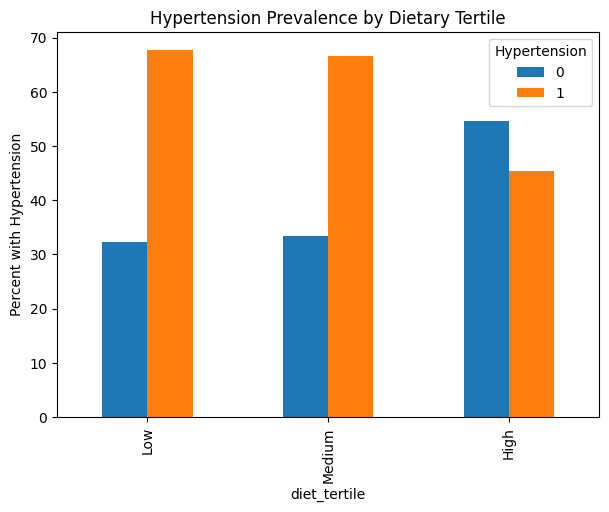

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

fig1 = pd.crosstab(df["diet_tertile"], df["Hypertension"], normalize="index")*100

fig1.plot(kind="bar", stacked=False, figsize=(7,5))
plt.ylabel("Percent with Hypertension")
plt.title("Hypertension Prevalence by Dietary Tertile")
plt.show()


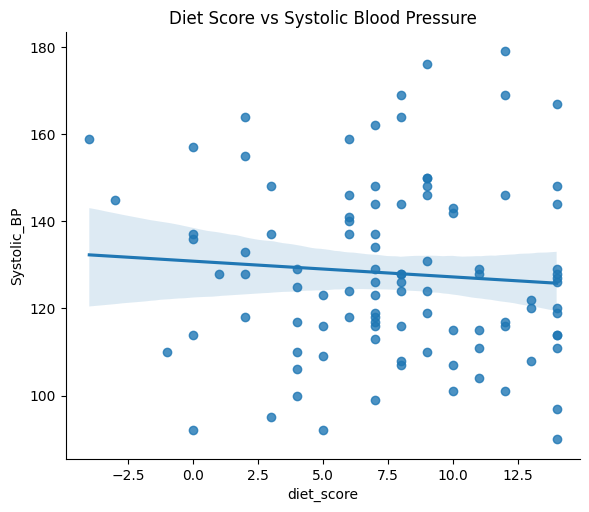

In [56]:
sns.lmplot(data=df, x="diet_score", y="Systolic_BP", height=5, aspect=1.2)
plt.title("Diet Score vs Systolic Blood Pressure")
plt.show()


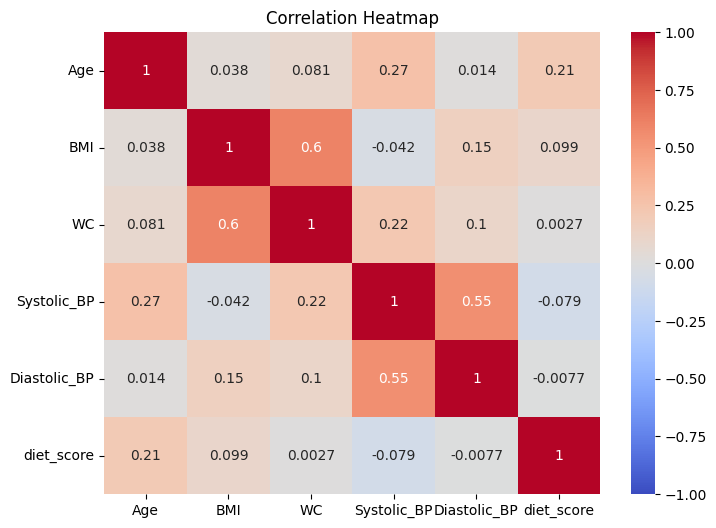

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Age","BMI","WC","Systolic_BP","Diastolic_BP","diet_score"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


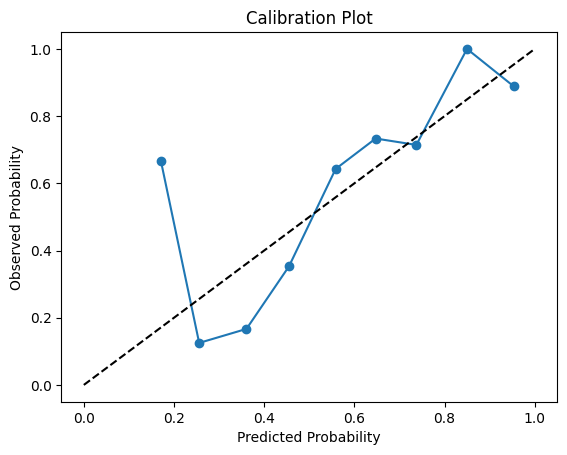

In [59]:
df["pred_prob"] = m3.predict()
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(df["Hypertension"], df["pred_prob"], n_bins=10)

plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Probability")
plt.title("Calibration Plot")
plt.show()
